In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import image
import os

### Read the image

In [18]:
im = image.imread(os.getcwd() + '\\sample_images\\vegetables-colorful.jpg')
im

array([[[215, 138, 107],
        [206, 130,  99],
        [196, 119,  88],
        ...,
        [ 24,   0,   8],
        [ 24,   0,   8],
        [ 24,   0,   8]],

       [[206, 130,  99],
        [201, 124,  93],
        [193, 116,  85],
        ...,
        [ 24,   0,   8],
        [ 24,   0,   8],
        [ 24,   0,   8]],

       [[211, 136, 104],
        [207, 133, 101],
        [203, 128,  96],
        ...,
        [ 24,   0,   8],
        [ 24,   0,   8],
        [ 24,   0,   8]],

       ...,

       [[ 27,   7,   5],
        [ 28,   8,   6],
        [ 31,  11,   8],
        ...,
        [ 21,   2,   4],
        [ 21,   2,   4],
        [ 21,   2,   4]],

       [[ 25,   5,   2],
        [ 26,   6,   4],
        [ 28,   8,   6],
        ...,
        [ 23,   5,   6],
        [ 23,   5,   6],
        [ 23,   5,   6]],

       [[ 24,   4,   1],
        [ 25,   5,   2],
        [ 27,   7,   5],
        ...,
        [ 24,   6,   8],
        [ 24,   6,   8],
        [ 24,   6,   8]]

In [19]:
im.shape

(408, 612, 3)

### Flattening the image to two dimension

In [20]:
input_image = im.reshape(im.shape[0] * im.shape[1], 3)

In [21]:
input_image.shape

(249696, 3)

In [48]:
kmeans = KMeans(n_clusters=16, random_state=42)

In [49]:
kmeans.fit(input_image)

KMeans(n_clusters=16, random_state=42)

In [50]:
mean_colors = kmeans.cluster_centers_

In [51]:
l = kmeans.labels_
l

array([14, 10, 10, ...,  2,  2,  2])

### Replacing the original colors by the mean colors

In [52]:
new_image = np.array([mean_colors[l[i]] for i in range(input_image.shape[0])])
new_image

array([[225.47706259, 193.76200213,  99.90380512],
       [171.38211744, 129.54715302,  69.19005783],
       [171.38211744, 129.54715302,  69.19005783],
       ...,
       [ 16.71454602,   5.64659546,   3.87065848],
       [ 16.71454602,   5.64659546,   3.87065848],
       [ 16.71454602,   5.64659546,   3.87065848]])

In [53]:
new_image = np.round(new_image).astype(np.uint8)

In [54]:
new_image = new_image.reshape(im.shape[0],im.shape[1],3)

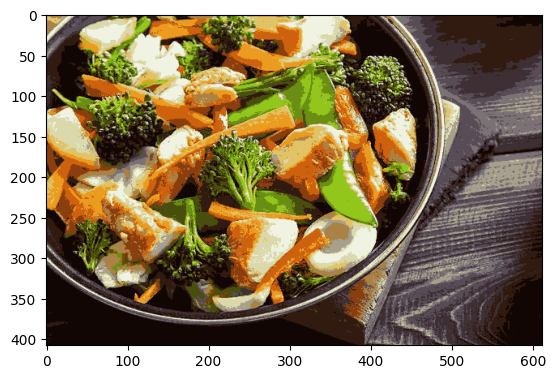

In [55]:
plt.imshow(new_image)

In [56]:
plt.imsave(os.getcwd() + '\\sample_images\\compressed_image.png', new_image)